To practice performing statistical inference in Python, we begin by importing a 2015 dataset that contains information on rollercoasters in international amusement parks. Take a glimpse at the data using the *head( )* , *tail( )*, or *describe( )* functions to familiarize yourself with the variables.

In [2]:
# Add libraries
import pandas as pd

# Import data 
Coasters = pd.read_csv("Coasters_2015.csv")

# Glimpse data
Coasters.tail()

,Name,Park,Track,Speed,Height,Drop,Length,Duration,Inversions
236,Thunderbird,Holiday World,Steel,60.0,140.0,NaN,3035.0,78.0,1
237,Twisted Colossus,Six Flags Magic Mountain,Steel,57.0,121.0,128.0,4990.0,220.0,1
238,Velikoluksky Miasokombinat,Wonder Island,Steel,62.1,124.7,NaN,3464.6,150.0,1
239,Wicked Cyclone,Six Flags New England,Steel,55.0,109.0,NaN,3320.0,NaN,1
240,Zombie Ride,Bosque M‡gico,Steel,62.0,150.0,NaN,863.0,NaN,1


## One-sample t-test

We will begin by performing a one-sample t-test. Recall that the purpose of this parametric test is to determine if there is a significant difference between a sample mean and the hypothesized population mean. Let's say we were interested in learning the true average speed of roller coasters in this dataset. Let's begin by finding the mean of our data's speed!

In [3]:
# Add Libraries
import numpy as np
import pandas as pd

# Find mean
mean_value = np.mean(Coasters["Speed"])

# Print the result
print("Mean:", mean_value)

Mean: 55.350622406639026


Roller coaster expert, Biddy Martin, previously stated that roller coasters actually travel at an average speed of 52 mph. Lets put her word to the test and perform a one-sample t-test to determine if this is likely to be true based on our sample. 
+ H0: The average speed of roller coasters is 52 mph.
+ HA: The average speed of roller coasters is not 52 mph.

Before we can put this mean to the test, let's follow our typical inference procedures and check the conditions. For a one-sample t-test we need to check the independence assumption and the normal population assumption. Our data satisifies the independence assumption because the data arises from a random sample of roller coasters.

To check the normal population assumption, we need to produce a histogram of the variable in question or a Normal probability plot. Since you have learned in previous lessons how to create a histogram, we will use this as an opportunity to teach you how to create a Normal probability plot, aka a Q-Q plot. 

The method we will use to specify create the Q-Q plot is from the *scipy.stats* plot, called *probplot( )*. We will need to specify the following options within the parentheses of this method to generate our desired plot:
+ data = our dataset and the variable in question, e.g. dataset_name["variable_name"]
+ plot = pyplot, this instructs Python to plot the quantiles

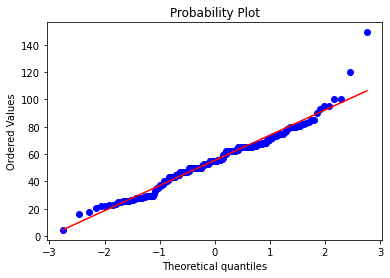

In [4]:
# Add libraries
import matplotlib.pyplot as plt

# Add our Q-Q funtion
from scipy.stats import probplot
from matplotlib import pyplot

# Draw the Q-Q plot
probplot(Coasters["Speed"], plot = pyplot)

# Display the plot
plt.show()

In the Normal probability plot above, we observe some deviation from the best fit line in the upper tail. However, given that this is a rather large sample (n > 50), we are safe to use *t* methods since the data is not extremely skewed. We will, however, still proceed with caution.

Using the function *ttest_1samp( )* from the *scipy.stats* library, let's perform our one-sample t-test. Within this new function, we will need to supply information for the following options:
+ data = our dataset and the variable in question, e.g. dataset_name["variable_name"]
+ popmean = expected value in null hypothesis

In [5]:
# Add necessary functions
from scipy.stats import ttest_1samp

# Assign the results of our test to two variables
t_test_value, p_value = ttest_1samp(Coasters["Speed"], 52)

# View the results
print("P Value:", p_value)
print("t-test Value:", t_test_value)

P Value: 0.005748417140227706
t-test Value: 2.7868265618258343


Great work! We have just performed our first one-sample t-test. Now lets instruct Python to determine for us whether or not the P Value for our t-test is small enough to reject the null hypothesis that the average speed is 52 mph.

In [6]:
# Let's use 0.05 or 5% as the significance level of alpha.
if p_value < 0.05:
    
    print("Reject the null hypothesis")
    
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


Unfortunately, it appears that Biddy may have been wrong, as we have to reject the null hypothesis that the average speed of a roller coaster is 52 mph at a significant level of 0.05. What a shocker! Biddy usually gets this stuff right. 

In [7]:
# Note: We do not need to assign the output of the function ttest_1samp to two values.
# Python automatically outputs our t-test value and p-value.
# However, it is good practice to assign these values so we can reuse them later.

ttest_1samp(Coasters["Speed"], 52)

Ttest_1sampResult(statistic=2.7868265618258343, pvalue=0.005748417140227706)

## Two-sample t-test

Recall that a two-sample t-test is used to determine if there is a significant difference between the sample means of two independent groups. This statistical inference method is also know as the independent samples t-test. Using the same dataset as before, lets see if the mean speed is the same for roller coasters made of wood and steel.
+ H0: The mean speeds for steel roller coasters and wood coasters are equal.
+ HA: The mean speeds are different.

As usual, we will start off by adding the libraries and functions we will need to use. Then, we will need to create two new dataframes from our original dataset, because the method for a two-sample t-test requires two dataframes.

In [8]:
# Separates the data into two new dataframes, where one is only Steel rollercoasters and the other is only Wood
steel = Coasters[Coasters.Track == "Steel"]
wood = Coasters[Coasters.Track == "Wood"]

# Confirm this for yourself by looking at the first few rows of each dataframe
steel.head()
wood.head()

,Name,Park,Track,Speed,Height,Drop,Length,Duration,Inversions
11,Son Of Beast,Paramount's Kings Island,Wood,78.4,218.0,214.0,7032.0,NaN,1
19,Rattler,Six Flags Fiesta Texas,Wood,73.0,179.5,166.5,5080.0,146.0,0
28,Boss,Six Flags St. Louis,Wood,66.3,122.0,150.0,5051.0,NaN,0
29,American Eagle,Six Flags Great America,Wood,66.0,127.0,147.0,4650.0,143.0,0
33,Hercules,Dorney Park,Wood,65.0,95.0,151.0,4000.0,135.0,0


Now that we have completed our set-up, let's check the conditions for inference. For a two-sample t-test, we need to check the randomization condition, independent groups condition, and the nearly normal condition. Again, since this is a random sample of roller coasters, we can satisfy the randomization assumption. Independence is satisified because one roller coaster being made of wood does not impact another roller coaster's likelihood to be made of steel. To test the normality condition, let's produce two Q-Q plots: one for each track type.

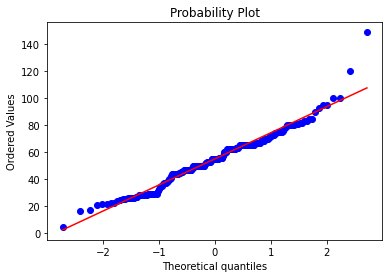

In [129]:
# Draw the Q-Q plot
probplot(steel["Speed"], plot = pyplot)

# Display the plot
plt.show()

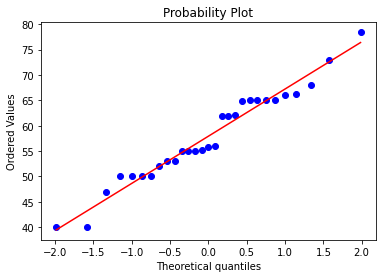

In [10]:
# Draw the Q-Q plot
probplot(wood["Speed"], plot = pyplot)

# Display the plot
plt.show()

The Q-Q plot for steel rollercoasters satisfies the normality condition, even through there is some slight deviation in the upper tail. Additionally, the sample size is large enough so that this deviation would not be a major issue. The Q-Q plot for wood rollercoasters visualizes substantially less roller coasters that are made from wood, but none of the roller coasters deviate dramatically from the line of best fit. Given these observations, we can proceed to complete our statistical inference.

Using the function *ttest_ind( )* from the scipy.stats library, let's perform our one-sample t-test. Within this new function, we will need to supply information for the following options:

+ data = our first dataset and the variable in question, e.g. dataset_name["variable_name"]
+ data = our second dataset and the variable in question, e.g. dataset_name["variable_name"]

In [11]:
# Add functions
from scipy.stats import ttest_ind

# Assign the results of our test to two variables
# IMPORTANT, "ttest_ind" requires you to specify a variable within your dataset
stat, p = ttest_ind(steel["Speed"], wood["Speed"])

# Display the results
print("p-values:", p)
print("t-test:", stat)

p-values: 0.42908098032852415
t-test: -0.7921118189812297


In [12]:
# Let's use 0.05 or 5% as the significance level of alpha.
if p < 0.05:
    
    print("Reject the null hypothesis")
    
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


At a significance level of 0.05, we fail to reject the null hypothesis that the speeds of the two different track types of roller coasters are the same. Let's take a look at the actual means of our data and see what we think.

In [13]:
# Find the mean speed for steel tracks
print(np.mean(steel["Speed"]))

54.99811320754719


In [14]:
# Find the mean speed for wooden tracks
print(np.mean(wood["Speed"]))

57.92758620689655


Some might argue that the difference between the mean speeds is substantial. However, according to our test, we lack sufficient evidence to reject the null hypothesis and state that speed changes depending on track type. Oh well. Maybe with a different sample dataset!

## Paired sample t-test
Our next statistical inference task is to complete a paired sample t-test, or a dependent sample t-test, on our Coasters dataset. Remind yourselves that a paired sample t-test checks if the mean difference between two observations of the same group is 0. These tests are particularly useful to determine the impact of a treatment in an experiment.

In this example, the data comes from Dr. Chico’s introductory statistics class. Students in the class take two tests over the course of the semester. Dr. Chico gives notoriously difficult exams with the intention of motivating her students to work hard in the class and thus learn as much as possible. Dr. Chico’s theory is that the first test will serve as a “wake up call” for her students, such that when they realize how difficult the class actually is they will be motivated to study harder and earn a higher grade on the second test than they got on the first test.

To determine if Dr. Chico's "wake up call" truly works, let's perform a paired sample t-test to determine whether or not a student's performance on the second exam is significantly different from their performance on the first exam.
+ H0: The average scores for each test will be the same.
+ HA: The average scores for each test are not the same.

Let's begin by importing the data and taking a look at its format.

In [15]:
# Import data 
Chico = pd.read_csv("chico_wide.csv")

# Glimpse data
Chico.tail()

,id,grade_test1,grade_test2
15,student16,58.7,60.1
16,student17,50.1,51.7
17,student18,64.2,65.6
18,student19,57.4,58.3
19,student20,57.1,60.1


Before we can begin our test, we will need to create two separate sets of data: one with the scores from the first exam and one with the scores from the second exam.

In [16]:
# Scores on the first exam
exam1 = Chico['grade_test1']

# Scores on the second exam
exam2 = Chico['grade_test2']

Recall that in a paired sample t-test, the conditions for inference are the paired data condition, independence, and normality. We know that the data satisfy the paired data condition because these two exam scores are dependent on a single student. Given that the data is paired, the groups are not independent, thus, here we are looking for pairwise differences. We can be certain that this data is independent because the observed differences are a representative sample from a population of interest. Additionally, one student's performance does not impact another student's performance on an exam. To check the normality condition, we can again produce our Q-Q plots to check.

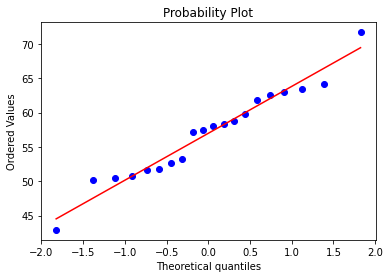

In [32]:
# Draw the Q-Q plot
probplot(exam1, plot = pyplot)

# Display the plot
plt.show()

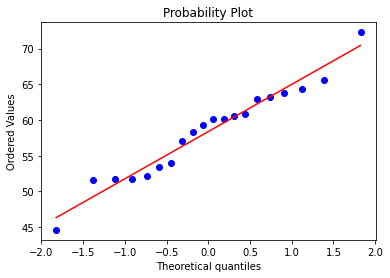

In [33]:
# Draw the Q-Q plot
probplot(exam2, plot = pyplot)

# Display the plot
plt.show()

Seeing as all of the datapoints roughly follow the line of best fit, we can assume that our data follows the normality condition. We will proceed to test our null hypothesis that Dr. Chico's theory produces no significant difference in students' performance.

In [ ]:
# Add method for our paired test
from scipy.stats import ttest_rel

# Assign the results of our test to two variables
stat, p = ttest_rel(exam1, exam2)

# Display the results
print("p-values:", p)
print("t-test:", stat)

In [ ]:
# Let's use 0.05 or 5% as the significance level of alpha.
if p < 0.05:
    
    print("Reject the null hypothesis")
    
else:
    print("Fail to reject the null hypothesis")

When alpha is equal to 0.05, we reject the null hypothesis that Dr. Chico's theory produces no significant difference in students' performance. Rather, it appears that students performed significantly better on the second exam, which may be a result of Dr. Chico making the first exam particularly challenging. 

## One-way ANOVA

In the case where we have two or multiple groups that we would like to compare at the same time, we will want to use ANOVA as our statistical inference test. ANOVA checks for a signficant difference between and within multiple groups, and it can test multiple hypotheses at once. 

In our example, we will analyze the backpack weight to body weight ratios of students in their first through third years of their undergraduate studies. 
+ H0: There is no significant difference between the ratios of these year groups.
+ H0: There is a significant difference between the ratios of these year groups.

Let's begin by familiarizing ourselves with the data.

In [3]:
# Import data 
bp = pd.read_csv("Backpack.csv")

# Glimpse the data
bp.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,BackpackWeight,BodyWeight,Ratio,BackProblems,Major,Year,Sex,Status,Units
0,0,0,0,0,9,125,0.072000,1,Bio,3,Female,U,13
1,1,1,1,4,8,180,0.044444,0,EE,2,Female,U,14
2,2,2,2,6,8,170,0.047059,0,CM,3,Male,U,15
3,3,3,3,10,8,135,0.059259,0,Bus,3,Female,U,15
4,4,4,4,14,12,125,0.096000,1,CS,3,Female,U,12


Let's check the conditions for inference for one-way ANOVA which are linearity, independence, equal variance, and normality. Our data satisfies the independence condition because one student's backpack to bodyweight ratio does not impact another student's ratio. We will produce a Normal Q-Q plot to check normality, and now we will also teach you how to create a Residuals vs. Fitted plot to check linearity and equal variance.

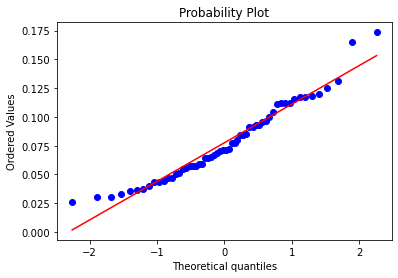

In [126]:
# Draw the Q-Q plot
probplot(bp["Ratio"], plot = pyplot)

# Display the figure
plt.show()

Based on the probability plot above, the data looks to be pretty normal with the exception of some slight deviation in the upper and lower tails. We will proceed to create the Residuals vs. Fitted plot with caution.

To produce the following plot, we will need to create the model for our one-way ANOVA. In this case, we will need to articulate to Python that we are trying to understand the relationship between backpack ratios and a student's year. After fitting the model, we will then need to direct Python to calculate the fitted and residual values. After that, we will be using matplotlib.pyplot to create a scatterplot of the residuals vs. fitted points.

When fitting a linear model, we will be using a new method called *ols( )* from the *statsmodels.formul.api* library. As good practice, we will assign the output to a variable. Within the parentheses, we must specify the following options:
+ data = our dataset
+ formula = "dependent_variable ~ explanatory_variable"
+ .fit() = function written after the parentheses that instructs Python to fit the model

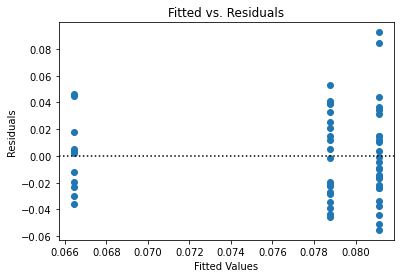

In [127]:
# Add libraries and functions
import pandas as pd
from statsmodels.formula.api import ols

# Fitting linear model
anova_mod = ols(data = bp, formula = "Ratio ~ C(Year)").fit()

# Fitted values that predict the backpack ratio
fitted = anova_mod.predict()

# Observed ratios - fitted values = residuals
# .resid finds the residuals
residuals = anova_mod.resid

# Residuals vs. fitted values
plt.scatter(fitted, residuals)

# Adds a line to more clearly see variance from 0
plt.axhline(y = 0, color = "black", linestyle = ":")

# Add labels
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs. Residuals")

# Display the graph
plt.show()

The fitted vs. residuals plot demonstrates that the conditions for linearity and equal variance are not satisifed by this dataset. The data points are showing clear patterns and do not fall around the zero line. For the sake of learning how to do ANOVA, we will continue without taking the results of the test to mean much.

Since our data is set-up and we have checked conditions, we can begin our one-way ANOVA test to see if backpack to bodyweight ratio changes depending on a student's year. We will generate a one-way ANOVA table using the function *stats.anova_lm* from the *statsmodels.api* library. As good practice, we will assign our table to a variable, and within the parentheses, specify the following options:
+ model = the model name assigned when we fit the model above
+ typ = the type of ANOVA test to perform, e.g. "1" for one-way ANOVA, "2" for two-way ANOVA, and so forth.

In [123]:
# Add new functions
from statsmodels.api import stats

# Create ANOVA table
anova_table = stats.anova_lm(anova_mod, typ = 1)

# Display the ANOVA table
print(anova_table)

            df    sum_sq   mean_sq         F    PR(>F)
C(Year)    2.0  0.001727  0.000863  0.763551  0.470884
Residual  55.0  0.062186  0.001131       NaN       NaN


Just now, we have tested the hypothesis that there is no difference between the mean backpack ratio for students of different years in their undergraduate studies. Our results show us that we fail to reject the null hypothesis at a significance level of 0.05, because the p-value for our F-statistic is 0.47. Meaning, there is no significant difference between the backpack to bodyweight ratios for students of different class years. However, given that our data fails the conditions for one-way ANOVA's inference, we should not take these results as fact and try again with a better dataset.

## References
+ https://brendanhcullen.github.io/psy611/labs/lab-9.html#data
+ https://www.reneshbedre.com/blog/anova.html
+ Python Data Analysis - Third Edition. (2019) 2022. Jupyter Notebook. Packt. https://github.com/PacktPublishing/Python-Data-Analysis-Third-Edition/blob/e1cd8029a1830fe5ecc86379ab361d215e71f036/Chapter05/HR_comma_sep.csv.
+ Agresti, Alan, and Maria Kateri. 2021. Foundations of Statistics for Data Scientists: With R and Python. CRC Press.
+ De Veaux, Richard D., Paul F. Velleman, and David E. Bock. 2022. Intro Stats. Sixth Edition. Pearson Education, Inc.
+ “STAT 2: Modeling with Regression and ANOVA 2E | Student Resources.” n.d. Accessed July 22, 2022. https://www.macmillanlearning.com/studentresources/college/collegebridgepage/stat22e.html.
+ Sunel, Khuzema. 2020. “Statistical Inference in Python Using Pandas, NumPy — Part I.” Medium. August 11, 2020. https://towardsdatascience.com/statistical-inference-in-pyhton-using-pandas-numpy-part-i-c2ac0320dffe.


## Two-Sample z-Test

If we wanted to test the difference between two proportions, we might want to conduct a two-sample z-test. A two-proportion z-test allows us to find the true difference between two proportions for two separate groups. In our example, we will use the Titanic dataset to determine if there is a significant difference in the proportion of people who survived depending on their gender. 

$H_0$: $p1$ - $p2$ = 0

$H_A$: $p1$ and $p2$ are not equal.

In [22]:
# Import data
Titanic = pd.read_csv("titanic_2020.txt", sep = "\t")

# Take a look at the data
Titanic.head()

,Name,Born,Died,Age,Gender,Class.Dept,Class,Ticket,Fare,Cabin,...,Occupation,Survived,Boat,Body,Nationality,Pounds,Shillings,Pence,Price.Paid,Paidpp
0,"ABBING, Mr Anthony",1870.0,1912.0,41.0,Male,3rd Class Passenger,3rd,5547,£7 11s,NaN,...,Blacksmith,LOST,NaN,NaN,American,7.0,11.0,NaN,7.55,7.55
1,"ABBOTT, Mr Eugene Joseph",1899.0,1912.0,13.0,Male,3rd Class Passenger,3rd,CA2673,£20 5s,NaN,...,Scholar,LOST,NaN,NaN,American,20.0,5.0,NaN,20.25,6.75
2,"ABBOTT, Mr Rossmore Edward",1896.0,1912.0,16.0,Male,3rd Class Passenger,3rd,CA2673,£20 5s,NaN,...,Jeweller,LOST,NaN,190.0,NaN,20.0,5.0,NaN,20.25,6.75
3,"ABBOTT, Mrs Rhoda Mary 'Rosa'",1873.0,1946.0,39.0,Female,3rd Class Passenger,3rd,CA2673,£20 5s,NaN,...,NaN,SAVED,A,NaN,English,20.0,5.0,NaN,20.25,6.75
4,"ABELSETH, Miss Kalle (Karen) Marie Kristiane",1895.0,1969.0,16.0,Female,3rd Class Passenger,3rd,348125,£7 13s,NaN,...,NaN,SAVED,16,NaN,NaN,7.0,13.0,NaN,7.65,7.65


In [21]:
pd.crosstab(Titanic["Gender"], Titanic["Survived"], margins = True)

Survived,LOST,SAVED,All
Gender,,,
Female,130,359,489
Male,1366,353,1719
All,1496,712,2208


In [18]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count_survived = [359, 353]
total_gender = [489, 1719]
stat, pval = proportions_ztest(count, nobs)

In [ ]:
# Display the results
print("p-values:", p)
print("t-test:", stat)